**Importing the data and splitting it into training and test data**

In [4]:
import numpy as np
import random
random.seed(43)
import seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

seaborn.set(style='whitegrid'); seaborn.set_context('talk')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.datasets import load_iris
iris_data = load_iris()


from sklearn.model_selection import train_test_split

In [5]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [6]:
print(iris_data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
data = np.column_stack((iris_data.data,iris_data.target.T)) #Joins the 4 features and the target variable which is encoded as 0,1,2 for setosa, versicolour and virginica

**Since all the categories are one after the other , we need to shuffle first**

In [9]:
data=pd.read_csv('/Users/veda/Downloads/housepricedata.csv')

#np.random.shuffle(data)

In [10]:
data.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [11]:
training, testing=train_test_split(data, test_size=0.2, train_size=0.8, random_state=43, shuffle=True, stratify=None)

train_X=training.iloc[:,:8]
train_y=training.iloc[:,8:]
test_X=training.iloc[:,:8]
test_y=training.iloc[:,8:]

#train_X.head()
#train_y.head()
#train_X.head()


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.transform(test_X)

In [13]:
from sklearn.base import BaseEstimator, ClassifierMixin #base estimator is the base class for all estimators, classifier mixin returns the mean accuracy on the given test data and labels.

class MultilayerPerceptron(BaseEstimator,ClassifierMixin):
    def __init__(self):
        self.inputLayer = 8                        # number of neurons in Input Layer
        self.hiddenLayer = 5                       # number of neurons in Hidden Layer
        self.outputLayer = 2                       # number of neurons Output Layer
        self.learningRate = 0.001                  # Learning rate
        self.max_epochs = 1000                     # Epochs
        self.BiasHiddenValue = -1                   # Bias HiddenLayer
        self.BiasOutputValue = -1                  # Bias OutputLayer
        self.activation = self.tanh # Activation function
        self.deriv = self.deriv_tanh
        
        
        #defining the starting weights and biases
        self.WEIGHT_hidden = self.starting_weights(self.hiddenLayer, self.inputLayer)
        self.WEIGHT_output = self.starting_weights(self.outputLayer, self.hiddenLayer)
        self.BIAS_hidden = np.array([self.BiasHiddenValue for i in range(self.hiddenLayer)])
        self.BIAS_output = np.array([self.BiasOutputValue for i in range(self.outputLayer)])
        self.classes_number = 2 
        
    
    def tanh(self,x):
        return np.tanh(x)

    def deriv_tanh(self,x):
        return (1-(self.tanh(x)**2))
    
    def starting_weights(self, x, y):
        #return [[ random.uniform(0,0.5)for i in range(x)] for j in range(y)]
        return [[2  * random.random() - 1 for i in range(x)] for j in range(y)]

    
    def backpropagation(self,x):
        #Step 1- find the error in the output layer, update the weights and bias between output layer and hidden layer
        
        DELTA_output = []
        
        ERROR_output = self.output - self.OUTPUT_L2 #expected output- received output
        DELTA_output = ((-1)*(ERROR_output) * self.deriv(self.OUTPUT_L2)) # (error*deriv) why -1?
        
        for i in range(self.hiddenLayer):#loops to connect from each node in hidden layer (i) to each node in output layer (j)
            for j in range(self.outputLayer):
                self.WEIGHT_output[i][j] -= (self.learningRate * (DELTA_output[j] * self.OUTPUT_L1[i])) #(error*deriv(j)*output from prev layer(i))
                self.BIAS_output[j] -= (self.learningRate * DELTA_output[j])
        
        #Step 2- find the error in the hidden layer, update the weights and bias between hidden layer and input layer
        
        delta_hidden = np.matmul(self.WEIGHT_output, DELTA_output)* self.deriv(self.OUTPUT_L1) #formula for delta term for hidden layer= (delta term for output layer multiplied by the weight to the output layer) multiplied by the derivative of the input to the hidden layer 
        
        
        for i in range(self.inputLayer):
            for j in range(self.hiddenLayer):
                self.WEIGHT_hidden[i][j] -= (self.learningRate * (delta_hidden[j] * x[i]))#multiplying the delta term by the input 
                self.BIAS_hidden[j] -= (self.learningRate * delta_hidden[j])
        
    def show_err_graphic(self,v_erro,v_epochs):
        plt.figure(figsize=(9,4))
        plt.plot(v_epochs, v_erro, "m-",color="b", marker=11)
        plt.xlabel("Number of Epochs")
        plt.ylabel("Squared error (MSE) ");
        plt.title("Error Minimization")
        plt.show()
        
        
    def predict(self, X, y):#Returns the predictions for every element of X
        
        predictions = []

        forward = np.matmul(X,self.WEIGHT_hidden) + self.BIAS_hidden#input to hidden layer
        forward = np.matmul(forward, self.WEIGHT_output) + self.BIAS_output#hidden layer to output layer

        for i in forward:
            predictions.append(max(enumerate(i), key=lambda x:x[1])[0])#WHAT DOES THIS DO

        array_score = []# creating output table
        for i in range(len(predictions)):
            if predictions[i] == 0: 
                array_score.append([i, 'negative', predictions[i], y.iloc[i]])
            elif predictions[i] == 1:
                 array_score.append([i, 'positive', predictions[i], y.iloc[i]])


        dataframe = pd.DataFrame(array_score, columns=['_id', 'class', 'output', 'expected_output'])
        return predictions, dataframe
        
        
    def fit(self, X, y):  
        count_epoch = 1
        total_error = 0
        n = len(X); 
        epoch_array = []
        error_array = []
        W0 = []
        W1 = []
        while(count_epoch <= self.max_epochs):
            for idx,inputs in enumerate(X): 
                #initialize expected input
                self.output = np.zeros(self.classes_number)
                #forward propogation i.e activation((inputs * weights)+bias)
                self.OUTPUT_L1 = self.activation((np.dot(inputs, self.WEIGHT_hidden)) + self.BIAS_hidden.T)
                self.OUTPUT_L2 = self.activation(np.dot(self.OUTPUT_L1, self.WEIGHT_output) + self.BIAS_output.T)
                #giving values for expected input based on the ground truth we have in y                    
                if(y.iloc[idx].any() == 0): 
                    self.output = np.array([1,0]) 
                elif(y.iloc[idx].any() == 1):
                    self.output = np.array([0,1]) 
               

                square_error = 0
                for i in range(self.outputLayer):
                    erro=0

                    erro = (self.output[i] - self.OUTPUT_L2[i])**2
                    square_error = (square_error + (0.05 * erro))#1/2 * error squared
                    total_error = total_error + square_error
                    
                #now, backpropogate
                self.backpropagation(inputs)

                total_error = (total_error / n)
                if((count_epoch % 50 == 0)or(count_epoch == 1)):
                    print("Epoch ", count_epoch, "- Total Error: ",total_error)
                    error_array.append(total_error)
                    epoch_array.append(count_epoch)
                    
                W0.append(self.WEIGHT_hidden)
                W1.append(self.WEIGHT_output)

                count_epoch+=1


        self.show_err_graphic(error_array,epoch_array)


In [14]:
print(train_y.iloc[0])

Fireplaces            0
GarageArea          779
AboveMedianPrice      0
Name: 676, dtype: int64


Epoch  1 - Total Error:  8.542032778913021e-05
Epoch  50 - Total Error:  3.3599486009336794e-05
Epoch  100 - Total Error:  0.0001642832659266632
Epoch  150 - Total Error:  0.00012594545033015847
Epoch  200 - Total Error:  5.090266162134092e-05
Epoch  250 - Total Error:  0.0001437769259872032
Epoch  300 - Total Error:  4.547412514633054e-06
Epoch  350 - Total Error:  5.034572991413587e-05
Epoch  400 - Total Error:  9.185164806485432e-06
Epoch  450 - Total Error:  5.848894867904896e-05
Epoch  500 - Total Error:  3.0015198471113916e-05
Epoch  550 - Total Error:  9.952049642979244e-05
Epoch  600 - Total Error:  1.0619839831675338e-05
Epoch  650 - Total Error:  2.3907642300635333e-05
Epoch  700 - Total Error:  4.408033416588715e-07
Epoch  750 - Total Error:  1.2846323634317825e-05
Epoch  800 - Total Error:  0.00021077740135187016
Epoch  850 - Total Error:  7.17705718324568e-05
Epoch  900 - Total Error:  4.419317617649196e-06
Epoch  950 - Total Error:  0.0001369852557761973
Epoch  1000 - Tot

/var/folders/gj/zldd_6z15jx7mkh09nlmyll80000gn/T/ipykernel_6206/2940080739.py:60: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "m-" (-> color='m'). The keyword argument will take precedence.
  plt.plot(v_epochs, v_erro, "m-",color="b", marker=11)


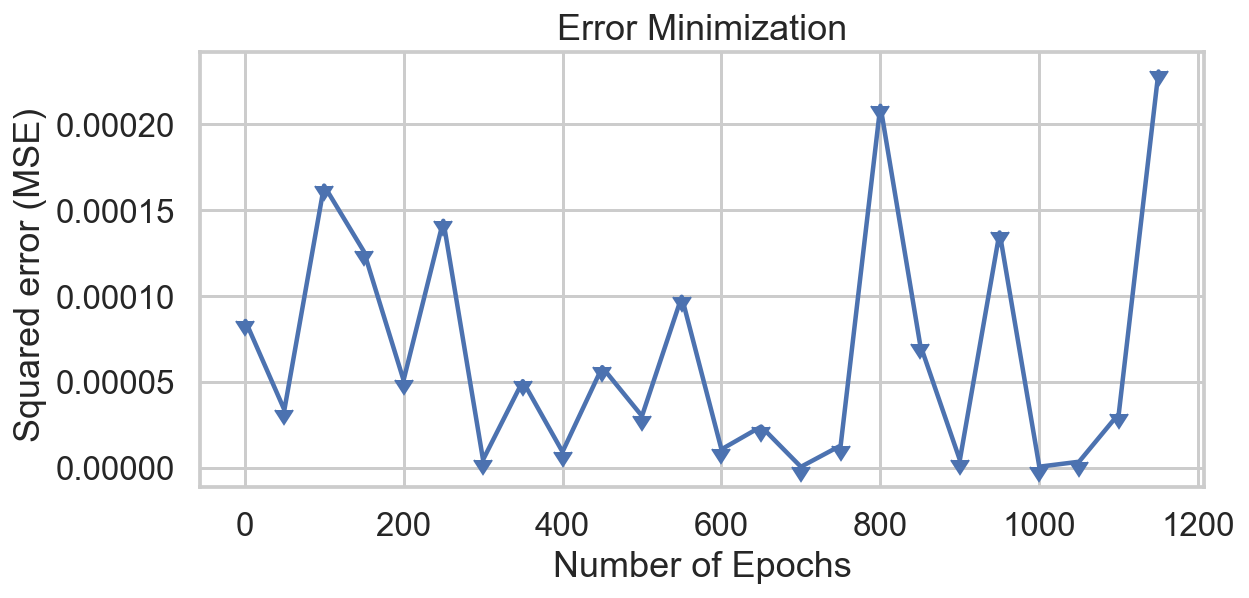

In [15]:
Perceptron = MultilayerPerceptron()
Perceptron.fit(train_X,train_y)


In [16]:
pred, dataframe = Perceptron.predict(test_X, test_y)
hits = n_pos=n_neg= 0
score_neg = score_pos = 0
for j in range(len(test_y)):
    if(test_y.iloc[j].any() == 0): 
        n_neg += 1
    elif(test_y.iloc[j].any() == 1): 
        n_pos += 1
   
        
for i in range(len(test_y)):
    if test_y.iloc[i].any() == pred[i]: 
        hits += 1
    if test_y.iloc[i].any() == pred[i] and test_y.iloc[i].any() == 0:
        score_neg += 1
    elif test_y.iloc[i].any() == pred[i] and test_y.iloc[i].any() == 1:
        score_pos += 1
         
hits = (hits / len(test_y)) * 100
faults = 100 - hits

In [17]:
dataframe

,_id,class,output,expected_output
0,0,positive,1,Fireplaces 0 GarageArea 77...
1,1,negative,0,Fireplaces 1 GarageArea 87...
2,2,negative,0,Fireplaces 0 GarageArea 36...
3,3,positive,1,Fireplaces 0 GarageArea 48...
4,4,positive,1,Fireplaces 1 GarageArea 79...
...,...,...,...,...
1163,1163,negative,0,Fireplaces 1 GarageArea 48...
1164,1164,negative,0,Fireplaces 1 GarageArea 64...
1165,1165,negative,0,Fireplaces 0 GarageArea 40...
1166,1166,positive,1,Fireplaces 1 GarageArea 42...


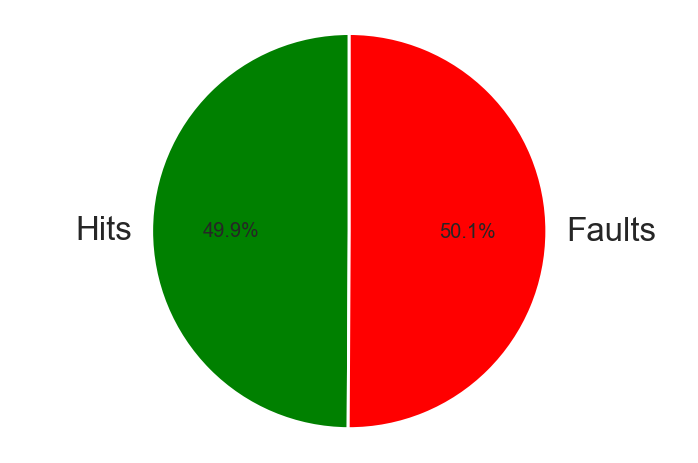

In [18]:
graph_hits = []


graph_hits.append(hits)
graph_hits.append(faults)
labels = 'Hits', 'Faults';
sizes = [96.5, 3.3]
explode = (0, 0.14)

fig1, ax1 = plt.subplots();
ax1.pie(graph_hits,colors=['green','red'],labels=labels, autopct='%1.1f%%',startangle=90)
ax1.axis('equal')
plt.show()